In [11]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from scipy.special import softmax

In [12]:
# Path to your JSONL file
input_file = "All_Beauty.jsonl"
output_file = "reviews.csv"

# Read JSONL into a list of dicts
data = []
with open(input_file, "r", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))

# Convert list of dicts to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv(output_file, index=False)

print(f"Converted {input_file} to {output_file} successfully!")


Converted All_Beauty.jsonl to reviews.csv successfully!


In [13]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


In [14]:
df = pd.read_csv("reviews.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             701528 non-null  float64
 1   title              701368 non-null  object 
 2   text               701316 non-null  object 
 3   images             701528 non-null  object 
 4   asin               701528 non-null  object 
 5   parent_asin        701528 non-null  object 
 6   user_id            701528 non-null  object 
 7   timestamp          701528 non-null  int64  
 8   helpful_vote       701528 non-null  int64  
 9   verified_purchase  701528 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 48.8+ MB


In [16]:
df.drop(columns=['images', 'asin', 'parent_asin', 'timestamp'], inplace=True)

In [17]:
df['verified_purchase'].replace({True: 1, False: 0}, inplace=True)

C:\Users\varun\AppData\Local\Temp\ipykernel_33000\3183712384.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['verified_purchase'].replace({True: 1, False: 0}, inplace=True)
C:\Users\varun\AppData\Local\Temp\ipykernel_33000\3183712384.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ver

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             701528 non-null  float64
 1   title              701368 non-null  object 
 2   text               701316 non-null  object 
 3   user_id            701528 non-null  object 
 4   helpful_vote       701528 non-null  int64  
 5   verified_purchase  701528 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 32.1+ MB


In [19]:
df.head()

,rating,title,text,user_id,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0,1
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",AGKHLEW2SOWHNMFQIJGBECAF7INQ,1,1
2,5.0,Yes!,"Smells good, feels great!",AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2,1
3,1.0,Synthetic feeling,Felt synthetic,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,1
4,5.0,A+,Love it,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,1


In [20]:
df.isnull().sum()

rating                 0
title                160
text                 212
user_id                0
helpful_vote           0
verified_purchase      0
dtype: int64

In [21]:
null_percentages_columns =  (df.isna().sum()/df.shape[0])*100
column_with_null_values = null_percentages_columns[null_percentages_columns>0]
column_with_null_values

title    0.022807
text     0.030220
dtype: float64

In [22]:
df = df.dropna()

In [23]:
df

,rating,title,text,user_id,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0,1
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",AGKHLEW2SOWHNMFQIJGBECAF7INQ,1,1
2,5.0,Yes!,"Smells good, feels great!",AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2,1
3,1.0,Synthetic feeling,Felt synthetic,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,1
4,5.0,A+,Love it,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,1
...,...,...,...,...,...,...
701523,4.0,Four Stars,Conditioner is great shampoo not as I expected,AFIXGFVEGLMOTMBTJL7H3VSIETDQ,0,1
701524,1.0,Pretty,Did not work! Used the whole bottle and my hai...,AFV7YZFOJF564EZGET5LG45K4QEA,0,0
701525,5.0,Great sunless tanner,Product as expected. Shipping was on time.,AHYDCWDMMVMLBX7FY7M7JKADKRDQ,0,1
701526,5.0,The Crown on top is a Ring!!!,"Not only is it a delicious fragrance, but also...",AF6ZIAEN7TQ2WY5ZL77F6JDPV7XQ,4,0


In [24]:
df.isnull().sum()

rating               0
title                0
text                 0
user_id              0
helpful_vote         0
verified_purchase    0
dtype: int64

In [25]:
df['verified_purchase'].value_counts()

verified_purchase
1    634670
0     66544
Name: count, dtype: int64

In [26]:
# remove all the purchases which are not verified
df = df[df['verified_purchase'] == 1]

In [27]:
df['verified_purchase'].value_counts()

verified_purchase
1    634670
Name: count, dtype: int64

In [28]:
df['user_id'].value_counts()

user_id
AGUTZC4GHLTGYHA3KBEDRF6MHB6A        27
AEYKTZXAWOPJG5MGGMKBLRJR6Q3A_2      22
AEFJCUL7E4UIXXUMCIGQV4VGLU5Q        21
AE5YGSWQJFOVOQBX7TVX3GYBPIGQ        17
AGFN3252BBTYUJUUDQMAGYZNUT5A_2_1    15
                                    ..
AF7LNLE4G7MZE36GTLHSVWMLUZ4Q         1
AEZHW6H5J6NAQMK5CGGBPFYX4VMA         1
AE2ZZSSRCQLN4DEZDBXOV27IMF2A         1
AFAZLVD2A5Q22OT7F2TEOGFQJP6A         1
AGIYQU6RK6TBKBCMWKVPBPBMMJNA         1
Name: count, Length: 584335, dtype: int64

In [29]:
for index, row in df.iterrows():
    if (row['user_id'] == 'AGUTZC4GHLTGYHA3KBEDRF6MHB6A'):
        print(row['text'])
        print()
# they are all different reviews so we will keep all the reviews

This eye mask is a must have if your overworked, tired, have dry or puffy eyes and so much more. It's very easy to use and can be easily controlled with the remote on the cord. The mask itself is super soft and comfortable and will have you feeling in awe while wearing it. It will help your eyes look and feel better in little to no time at all

This is very easy to use first deep clean your face to keep dirt and particles off it. Then put the mask on and choose the time. Then choose the mode with max of 15 minutes at a time. When it's done your good to go and enjoy your day. It comes with seven colors to choose from. Red which is 630nm and improves cell activity,  improves collagen function, increases skin elasticity and helps repair damaged skin. Blue which is 470nm and whiten, fade spots, increase skin elasticity, and improves the skin condition. Green which is 520nm and it can balance the skins oilsecretion which balances the water/oil ratio. Yellow which is 590nm and it improves th

In [30]:
# making all the text to lowercase
df['title'] = df['title'].str.lower()
df['text'] = df['text'].str.lower()

C:\Users\varun\AppData\Local\Temp\ipykernel_33000\2040684614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'] = df['title'].str.lower()
C:\Users\varun\AppData\Local\Temp\ipykernel_33000\2040684614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].str.lower()


In [31]:
# removing all special characters from the text and title columns
df['title'] = df['title'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)
df['text'] = df['text'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)

C:\Users\varun\AppData\Local\Temp\ipykernel_33000\2245847235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'] = df['title'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)
C:\Users\varun\AppData\Local\Temp\ipykernel_33000\2245847235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)


In [32]:
df

,rating,title,text,user_id,helpful_vote,verified_purchase
0,5.0,such a lovely scent but not overpowering,this spray is really nice it smells really goo...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0,1
1,4.0,works great but smells a little weird,this product does what i need it to do i just ...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1,1
2,5.0,yes,smells good feels great,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2,1
3,1.0,synthetic feeling,felt synthetic,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,1
4,5.0,a,love it,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,1
...,...,...,...,...,...,...
701521,5.0,perfect hair choice,absolutely love it hold curls well it dyed per...,AHMU2NL2V6PT7KCAR6FNCM2GAYSA,9,1
701522,1.0,i got a completely different bottle than this,what i got was a completely different bottle t...,AGZIX3V6YHAG3JCUUUWY57FBO5OA,0,1
701523,4.0,four stars,conditioner is great shampoo not as i expected,AFIXGFVEGLMOTMBTJL7H3VSIETDQ,0,1
701525,5.0,great sunless tanner,product as expected shipping was on time,AHYDCWDMMVMLBX7FY7M7JKADKRDQ,0,1


## Exploratory Data Analysis (EDA)

In [33]:
df['rating'].value_counts()

rating
5.0    380699
1.0     94398
4.0     68781
3.0     51069
2.0     39723
Name: count, dtype: int64

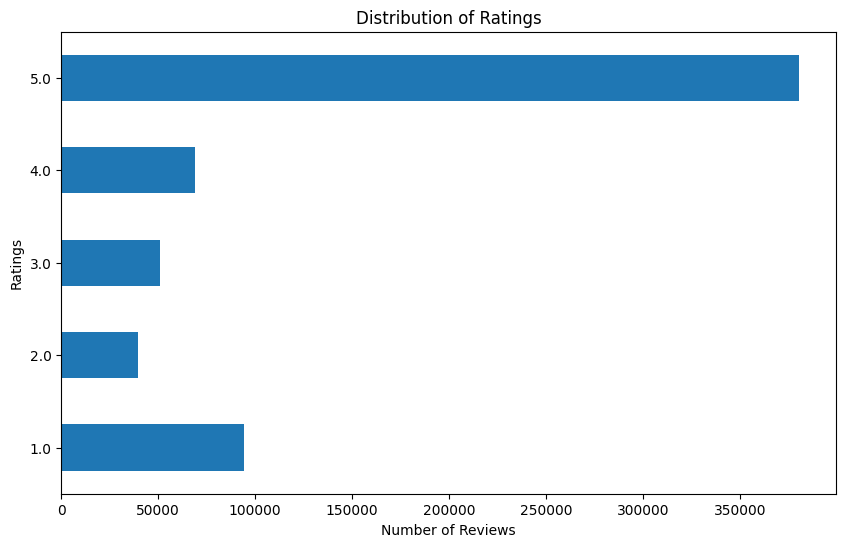

In [34]:
plt.figure(figsize=(10,6))
df['rating'].value_counts().sort_index().plot(kind='barh')
plt.xlabel('Number of Reviews')
plt.ylabel('Ratings')
plt.title('Distribution of Ratings')
plt.show()

In [35]:
df['helpful_vote'].unique()

array([  0,   1,   2, 430,   4,   8,   5,  13,   3,   6,  16,   9,   7,
        11,  58,  50,  10,  15,  52,  23,  14,  38,  18,  40,  30,  22,
        37,  43,  29,  51, 120,  24,  47,  32,  12,  17,  92,  42,  20,
        41,  33,  19,  63,  27,  28,  21,  31,  25, 133,  57,  26,  64,
        71,  36, 114,  89,  53, 101,  60,  72,  35,  45,  46, 419,  59,
        44,  65,  39,  74,  99,  56,  34,  54,  48,  69,  75,  55,  67,
       111, 150, 143,  73, 117,  79, 148, 177,  80, 154,  86,  66,  95,
        81, 165, 140, 171,  76,  85,  62, 113,  61, 404, 166, 124,  49,
        90, 315,  70,  88, 112, 426, 158, 145, 129,  98, 107, 109, 314,
       187, 123, 155, 142, 126, 218, 127, 104, 118, 172, 147, 331,  68,
        78, 141, 159, 185, 173, 241, 646, 151, 149,  83,  82, 136, 134,
       132,  93, 121, 594, 399, 389, 473, 351, 467, 435, 354, 234, 519,
        94, 131, 181, 103, 105, 431, 190,  77, 138, 367, 197, 125, 178,
       152, 244, 409, 249,  91,  87, 373, 144, 233, 102, 179,  8

In [36]:
df['helpful_vote'].value_counts()

helpful_vote
0      466128
1       89426
2       30866
3       14805
4        8485
        ...  
197         1
138         1
113         1
431         1
382         1
Name: count, Length: 231, dtype: int64

<Axes: ylabel='Density'>

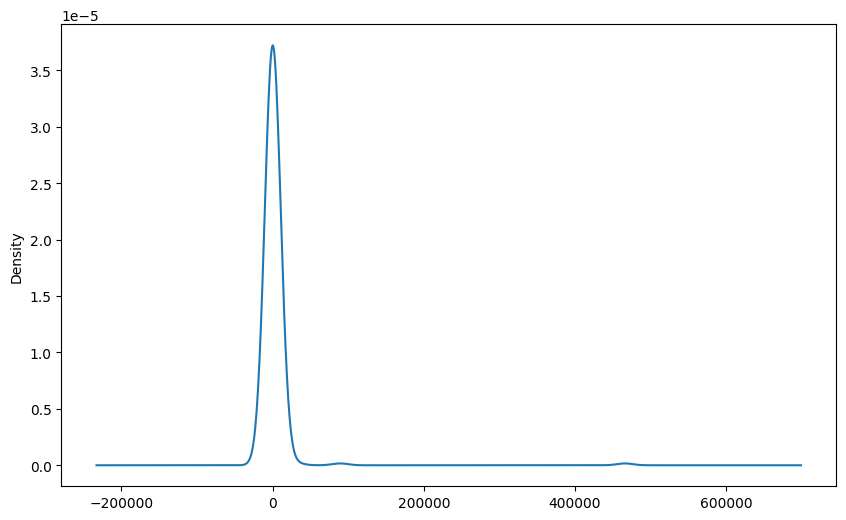

In [37]:
df['helpful_vote'].value_counts().plot(kind='kde', figsize=(10,6))

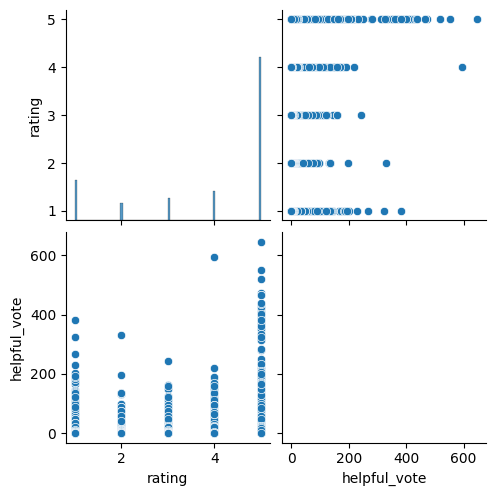

In [38]:
sns.pairplot(df,vars =['rating','helpful_vote'])

In [39]:
df_corr = df['helpful_vote'].corr(df['rating'])
df_corr

0.008159874087319786

<Axes: >

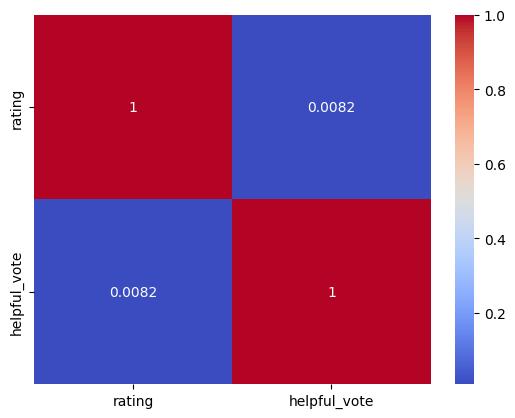

In [40]:
# Assuming 'rating' and 'helpful_vote' are your numeric columns
numeric_cols = ['rating', 'helpful_vote'] 
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')

In [41]:
df

,rating,title,text,user_id,helpful_vote,verified_purchase
0,5.0,such a lovely scent but not overpowering,this spray is really nice it smells really goo...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0,1
1,4.0,works great but smells a little weird,this product does what i need it to do i just ...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1,1
2,5.0,yes,smells good feels great,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2,1
3,1.0,synthetic feeling,felt synthetic,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,1
4,5.0,a,love it,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,1
...,...,...,...,...,...,...
701521,5.0,perfect hair choice,absolutely love it hold curls well it dyed per...,AHMU2NL2V6PT7KCAR6FNCM2GAYSA,9,1
701522,1.0,i got a completely different bottle than this,what i got was a completely different bottle t...,AGZIX3V6YHAG3JCUUUWY57FBO5OA,0,1
701523,4.0,four stars,conditioner is great shampoo not as i expected,AFIXGFVEGLMOTMBTJL7H3VSIETDQ,0,1
701525,5.0,great sunless tanner,product as expected shipping was on time,AHYDCWDMMVMLBX7FY7M7JKADKRDQ,0,1


## Sentiment Analysis

In [42]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from scipy.special import softmax

MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


c:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [43]:
def sentiment_analysis(text):
    encoded_text = tokenizer(
        text,
        return_tensors='pt',
        truncation=True,
        max_length=512
    )      
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'negative': scores[0],
        'neutral': scores[1],
        'positive': scores[2]
    }
    return scores_dict

In [44]:
df = df[:10000]

In [45]:
for index, row in df.iterrows():
    # try:
    text = row['text']
    scores = sentiment_analysis(text)
    df.loc[index, 'negative'] = scores['negative']
    df.loc[index, 'neutral'] = scores['neutral']
    df.loc[index, 'positive'] = scores['positive']
    # except Exception as e:
    #     print(f"Error processing row {index}: {e}")

C:\Users\varun\AppData\Local\Temp\ipykernel_33000\226492050.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[index, 'negative'] = scores['negative']
C:\Users\varun\AppData\Local\Temp\ipykernel_33000\226492050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[index, 'neutral'] = scores['neutral']
C:\Users\varun\AppData\Local\Temp\ipykernel_33000\226492050.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

Text(0.5, 0, 'Rating')

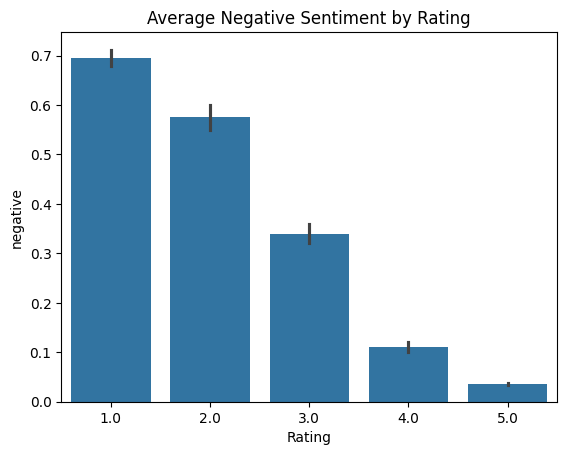

In [46]:
ax = sns.barplot(data=df, x='rating', y='negative')
ax.set_title('Average Negative Sentiment by Rating')
ax.set_xlabel('Rating')


In [47]:
df

,rating,title,text,user_id,helpful_vote,verified_purchase,negative,neutral,positive
0,5.0,such a lovely scent but not overpowering,this spray is really nice it smells really goo...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0,1,0.013825,0.070569,0.915606
1,4.0,works great but smells a little weird,this product does what i need it to do i just ...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1,1,0.518993,0.378989,0.102017
2,5.0,yes,smells good feels great,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2,1,0.002125,0.019420,0.978455
3,1.0,synthetic feeling,felt synthetic,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,1,0.487468,0.479562,0.032971
4,5.0,a,love it,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,1,0.024174,0.079559,0.896267
...,...,...,...,...,...,...,...,...,...
13184,5.0,travel case,good for travel,AHJWEHWMJNSK45525U5BXUBYJWFQ,0,1,0.003904,0.103393,0.892702
13185,4.0,glides great,i like the product it goes on nicely may pur...,AH4UC3EQOTPXWLZL4UQNWABXVQRQ,1,1,0.185065,0.341599,0.473336
13186,5.0,a nice addition to your gym bag,lightweight and durable perfect for on the go ...,AEVQNCNWB3EARSAULPPPFTNNPEDQ,1,1,0.007634,0.181576,0.810789
13187,5.0,exact,came fast and was exactly as advertised thank you,AFWKLAXPSCDQ2SF52DBB4RP73XCA,0,1,0.004021,0.046668,0.949310


In [48]:
df.shape

(10000, 9)

In [49]:
# create a new column 'sentiment' based on the highest score among negative, neutral, positive
def determine_sentiment(row):
    sentiments = ['negative', 'neutral', 'positive']
    scores = [row['negative'], row['neutral'], row['positive']]
    max_index = scores.index(max(scores))
    return sentiments[max_index]

df['sentiment'] = df.apply(determine_sentiment, axis=1)
df

C:\Users\varun\AppData\Local\Temp\ipykernel_33000\1898188046.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df.apply(determine_sentiment, axis=1)


,rating,title,text,user_id,helpful_vote,verified_purchase,negative,neutral,positive,sentiment
0,5.0,such a lovely scent but not overpowering,this spray is really nice it smells really goo...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0,1,0.013825,0.070569,0.915606,positive
1,4.0,works great but smells a little weird,this product does what i need it to do i just ...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1,1,0.518993,0.378989,0.102017,negative
2,5.0,yes,smells good feels great,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2,1,0.002125,0.019420,0.978455,positive
3,1.0,synthetic feeling,felt synthetic,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,1,0.487468,0.479562,0.032971,negative
4,5.0,a,love it,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,1,0.024174,0.079559,0.896267,positive
...,...,...,...,...,...,...,...,...,...,...
13184,5.0,travel case,good for travel,AHJWEHWMJNSK45525U5BXUBYJWFQ,0,1,0.003904,0.103393,0.892702,positive
13185,4.0,glides great,i like the product it goes on nicely may pur...,AH4UC3EQOTPXWLZL4UQNWABXVQRQ,1,1,0.185065,0.341599,0.473336,positive
13186,5.0,a nice addition to your gym bag,lightweight and durable perfect for on the go ...,AEVQNCNWB3EARSAULPPPFTNNPEDQ,1,1,0.007634,0.181576,0.810789,positive
13187,5.0,exact,came fast and was exactly as advertised thank you,AFWKLAXPSCDQ2SF52DBB4RP73XCA,0,1,0.004021,0.046668,0.949310,positive


In [50]:
# we are now going to make a one hot encoded column of the sentiment column
df = pd.get_dummies(df, columns=['sentiment'])
df

,rating,title,text,user_id,helpful_vote,verified_purchase,negative,neutral,positive,sentiment_negative,sentiment_neutral,sentiment_positive
0,5.0,such a lovely scent but not overpowering,this spray is really nice it smells really goo...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0,1,0.013825,0.070569,0.915606,False,False,True
1,4.0,works great but smells a little weird,this product does what i need it to do i just ...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1,1,0.518993,0.378989,0.102017,True,False,False
2,5.0,yes,smells good feels great,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2,1,0.002125,0.019420,0.978455,False,False,True
3,1.0,synthetic feeling,felt synthetic,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,1,0.487468,0.479562,0.032971,True,False,False
4,5.0,a,love it,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,1,0.024174,0.079559,0.896267,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
13184,5.0,travel case,good for travel,AHJWEHWMJNSK45525U5BXUBYJWFQ,0,1,0.003904,0.103393,0.892702,False,False,True
13185,4.0,glides great,i like the product it goes on nicely may pur...,AH4UC3EQOTPXWLZL4UQNWABXVQRQ,1,1,0.185065,0.341599,0.473336,False,False,True
13186,5.0,a nice addition to your gym bag,lightweight and durable perfect for on the go ...,AEVQNCNWB3EARSAULPPPFTNNPEDQ,1,1,0.007634,0.181576,0.810789,False,False,True
13187,5.0,exact,came fast and was exactly as advertised thank you,AFWKLAXPSCDQ2SF52DBB4RP73XCA,0,1,0.004021,0.046668,0.949310,False,False,True


In [51]:
df['sentiment_positive']  = df['sentiment_positive'].replace({True: 1, False: 0})
df['sentiment_neutral']  = df['sentiment_neutral'].replace({True: 1, False: 0})
df['sentiment_negative']  = df['sentiment_negative'].replace({True: 1, False: 0})
df

C:\Users\varun\AppData\Local\Temp\ipykernel_33000\2644633873.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment_positive']  = df['sentiment_positive'].replace({True: 1, False: 0})
C:\Users\varun\AppData\Local\Temp\ipykernel_33000\2644633873.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment_neutral']  = df['sentiment_neutral'].replace({True: 1, False: 0})
C:\Users\varun\AppData\Local\Temp\ipykernel_33000\2644633873.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remove

,rating,title,text,user_id,helpful_vote,verified_purchase,negative,neutral,positive,sentiment_negative,sentiment_neutral,sentiment_positive
0,5.0,such a lovely scent but not overpowering,this spray is really nice it smells really goo...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0,1,0.013825,0.070569,0.915606,0,0,1
1,4.0,works great but smells a little weird,this product does what i need it to do i just ...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1,1,0.518993,0.378989,0.102017,1,0,0
2,5.0,yes,smells good feels great,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2,1,0.002125,0.019420,0.978455,0,0,1
3,1.0,synthetic feeling,felt synthetic,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,1,0.487468,0.479562,0.032971,1,0,0
4,5.0,a,love it,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0,1,0.024174,0.079559,0.896267,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
13184,5.0,travel case,good for travel,AHJWEHWMJNSK45525U5BXUBYJWFQ,0,1,0.003904,0.103393,0.892702,0,0,1
13185,4.0,glides great,i like the product it goes on nicely may pur...,AH4UC3EQOTPXWLZL4UQNWABXVQRQ,1,1,0.185065,0.341599,0.473336,0,0,1
13186,5.0,a nice addition to your gym bag,lightweight and durable perfect for on the go ...,AEVQNCNWB3EARSAULPPPFTNNPEDQ,1,1,0.007634,0.181576,0.810789,0,0,1
13187,5.0,exact,came fast and was exactly as advertised thank you,AFWKLAXPSCDQ2SF52DBB4RP73XCA,0,1,0.004021,0.046668,0.949310,0,0,1


In [52]:
df.to_excel("reviews_with_sentiment.xlsx")